In [1]:
import pandas as pd
import numpy as np

from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from scipy.signal import normalize
from sklearn.preprocessing import StandardScaler

# pd.options.plotting.backend = "plotly"

In [2]:
test1 = pd.read_csv("../data/haiend-23.05/end-test1.csv")
test2 = pd.read_csv("../data/haiend-23.05/end-test2.csv")

label_test1 = pd.read_csv("../data/haiend-23.05/label-test1.csv")
label_test2 = pd.read_csv("../data/haiend-23.05/label-test2.csv")

#########################

# train1 = pd.read_csv("../data/haiend-23.05/end-train1.csv")
# train2 = pd.read_csv("../data/haiend-23.05/end-train2.csv")
# train3 = pd.read_csv("../data/haiend-23.05/end-train3.csv")
# train4 = pd.read_csv("../data/haiend-23.05/end-train4.csv")


In [3]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', -1)

# Test1, label_test_1

In [4]:
test1.head()

,Timestamp,DM-PP01-R,DM-FT01Z,DM-FT02Z,DM-FT03Z,1001.2-OUT,1001.7-OUT1,1001.7-OUT2,1001.8-OUT,1002.2-OUT,1002.6-OUT,1002.11-OUT1,1002.11-OUT2,1002.12-OUT,1002.16-OUT1,1002.16-OUT2,1002.19-OUT,1002.29-OUT,1002.34-OUT,1003.7-OUT,1003.12-OUT1,1003.12-OUT2,1003.13-OUT,1003.27-OUT,1004.11-OUT1,1004.11-OUT2,1004.12-OUT1,1004.12-OUT2,1004.13-OUT,1004.15-OUT1,1004.15-OUT2,1004.18-OUT1,1004.18-OUT2,1004.21-OUT,1004.24-OUT,1004.29-OUT,1004.36-OUT,1004.37-OUT,1004.38-OUT,1004.39-OUT,1004.41-OUT,1004.44-OUT,1004.52-OUT,1004.53-OUT,1004.62-OUT,1004.76-OUT,1004.78-OUT,1004.79-OUT,1004.80-OUT,1010.2-OUT,1010.3-OUT,1010.4-OUT,1010.5-OUT1,1010.5-OUT2,1010.5-OUT3,1010.5-OUT4,1010.7-OUT,1010.8-OUT,1010.9-OUT,1010.10-OUT,1010.11-OUT,1010.12-OUT1,1010.12-OUT2,1010.16-OUT,1010.17-OUT,1010.19-OUT,1010.23-OUT,1010.30-OUT,1010.31-OUT,1010.33-OUT,1010.35-OUT,1010.38-OUT,1010.39-OUT,1010.41-OUT,1010.42-OUT,1010.44-OUT,1010.46-OUT,1010.47-OUT,1010.50-OUT,1010.54-OUT,1010.56-OUT,1011.2-OUT,1011.3-OUT,1011.4-OUT,1011.5-OUT1,1011.5-OUT2,1011.5-OUT3,1011.5-OUT4,1011.7-OUT,1011.8-OUT,1011.9-OUT,1011.10-OUT,1011.11-OUT,1011.12-OUT1,1011.12-OUT2,1011.16-OUT,1011.17-OUT,1011.19-OUT,1011.23-OUT,1011.30-OUT,1011.31-OUT,1011.33-OUT,1011.35-OUT,1011.38-OUT,1011.39-OUT,1011.41-OUT,1011.42-OUT,1011.44-OUT,1011.46-OUT,1011.47-OUT,1011.50-OUT,1011.54-OUT,1011.56-OUT,1020.2-OUT,1020.3-OUT,1020.5-OUT1,1020.5-OUT2,1020.9-OUT,1020.10-OUT,1020.11-OUT,1020.18-OUT,1020.20-OUT,1020.21-OUT,DM-CIP-1ST,DM-CIP-2ND,DM-CIPH-1ST,DM-CIPH-2ND,DM-CIPH-START,DM-CIPH-STEP1,DM-CIPH-STEP11,DM-PP01A-D,DM-CIP-START,DM-CIP-STEP1,DM-CIP-STEP11,DM-COOL-ON,DM-COOL-R,DM-LSH-03,DM-LSH-04,DM-LSL-04,DM-PIT01-HH,DM-PP04-D,DM-PP01A-R,DM-SOL01-D,DM-SOL02-D,DM-SOL03-D,DM-SOL04-D,DQ03-LCV01-D,DQ04-LCV01-DEV,1001.5-OUT,1001.9-OUT,1001.13-OUT,1001.14-OUT,1001.15-OUT,1001.16-OUT,1001.17-OUT,1001.20-OUT,1002.7-OUT,1002.8-OUT,1002.9-OUT,1002.14-OUT,1002.15-OUT,1002.20-OUT,1002.21-OUT,1002.30-OUT,1002.31-OUT,1003.5-OUT,1003.10-OUT,1003.11-OUT,1003.17-OUT,1003.18-OUT,1003.23-OUT,1003.24-OUT,1003.25-OUT,1003.26-OUT,1003.29-OUT,1003.30-OUT,1020.4-OUT,1020.13-OUT,1020.14-OUT,1020.15-OUT,DM-AIT-DO,DM-AIT-PH,DM-PP04-AO,DM-PP04-SV,DM-TWIT-04,DM-TWIT-05,GATEOPEN,PP04-SP-OUT,DM-HT01-D,DM-LCV01-MIS,DM-LSH01,DM-LSH02,DM-LSL01,DM-LSL02,DM-PCV01-DEV,DM-PP01B-D,DM-PP01B-R,DM-PP02-D,DM-PP02-R,DM-SS01-RM,DM-ST-SP,DM-SW01-ST,DM-SW02-SP,DM-SW03-EM,DM-FCV01-D,DM-FCV01-Z,DM-FCV02-D,DM-FCV02-Z,DM-FCV03-D,DM-FCV03-Z,DM-FT01,DM-FT02,DM-FT03,DM-LCV01-D,DM-LCV01-Z,DM-LIT01,DM-PCV01-D,DM-PCV01-Z,DM-PCV02-D,DM-PCV02-Z,DM-PIT01,DM-PIT02,DM-PWIT-03,DM-TIT01,DM-TIT02,DM-TWIT-03
0,2022-08-12 16:00:00,0,327.919220,3111.298340,980.072021,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.051476,40,6.551514,1.034203,1.031342,26.214691,26.214691,26.214691,398.630859,982.023132,50.505592,30,0,50.505592,19.704260,19.704260,19.113132,97.712090,3111.298340,60.937866,60.993156,26.478054,6.551514,30.253811,100.0,60.937073,60.937073,60.937073,0,69.120934,69.120934,33.824188,0.084228,3.683075,33.824188,19,28.367004,26.008057,6.551514,27.488815,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,60.993156,60.494995,15.0,12.445066,50.534317,51.995850,64.697266,2387.847656,237.693771,19.119713,18.601988,395.399750,26.199059,26.841734,12.0,11.689758,0.943146,0.407562,0.000639,29.211426,33.865349,26.747803
1,2022-08-12 16:00:01,0,336.857086,3116.427979,980.941772,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.051476,40,6.570587,1.037064,1.034203,26.251205,26.251205,26.251205,398.630859,982.023132,50.528187,30,

In [5]:
label_test1.head()

,timestamp,label
0,2022-08-12 16:00:01,0
1,2022-08-12 16:00:02,0
2,2022-08-12 16:00:03,0
3,2022-08-12 16:00:04,0
4,2022-08-12 16:00:05,0


In [6]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Columns: 226 entries, Timestamp to DM-TWIT-03
dtypes: float64(60), int64(165), object(1)
memory usage: 93.1+ MB


In [7]:
test1['Timestamp'] = test1["Timestamp"].astype("datetime64[ns]") + pd.Timedelta(1, "s")
test1.rename({"Timestamp": "Timestamp_test"}, axis=1, inplace=True)

In [8]:
test1.head()

,Timestamp_test,DM-PP01-R,DM-FT01Z,DM-FT02Z,DM-FT03Z,1001.2-OUT,1001.7-OUT1,1001.7-OUT2,1001.8-OUT,1002.2-OUT,1002.6-OUT,1002.11-OUT1,1002.11-OUT2,1002.12-OUT,1002.16-OUT1,1002.16-OUT2,1002.19-OUT,1002.29-OUT,1002.34-OUT,1003.7-OUT,1003.12-OUT1,1003.12-OUT2,1003.13-OUT,1003.27-OUT,1004.11-OUT1,1004.11-OUT2,1004.12-OUT1,1004.12-OUT2,1004.13-OUT,1004.15-OUT1,1004.15-OUT2,1004.18-OUT1,1004.18-OUT2,1004.21-OUT,1004.24-OUT,1004.29-OUT,1004.36-OUT,1004.37-OUT,1004.38-OUT,1004.39-OUT,1004.41-OUT,1004.44-OUT,1004.52-OUT,1004.53-OUT,1004.62-OUT,1004.76-OUT,1004.78-OUT,1004.79-OUT,1004.80-OUT,1010.2-OUT,1010.3-OUT,1010.4-OUT,1010.5-OUT1,1010.5-OUT2,1010.5-OUT3,1010.5-OUT4,1010.7-OUT,1010.8-OUT,1010.9-OUT,1010.10-OUT,1010.11-OUT,1010.12-OUT1,1010.12-OUT2,1010.16-OUT,1010.17-OUT,1010.19-OUT,1010.23-OUT,1010.30-OUT,1010.31-OUT,1010.33-OUT,1010.35-OUT,1010.38-OUT,1010.39-OUT,1010.41-OUT,1010.42-OUT,1010.44-OUT,1010.46-OUT,1010.47-OUT,1010.50-OUT,1010.54-OUT,1010.56-OUT,1011.2-OUT,1011.3-OUT,1011.4-OUT,1011.5-OUT1,1011.5-OUT2,1011.5-OUT3,1011.5-OUT4,1011.7-OUT,1011.8-OUT,1011.9-OUT,1011.10-OUT,1011.11-OUT,1011.12-OUT1,1011.12-OUT2,1011.16-OUT,1011.17-OUT,1011.19-OUT,1011.23-OUT,1011.30-OUT,1011.31-OUT,1011.33-OUT,1011.35-OUT,1011.38-OUT,1011.39-OUT,1011.41-OUT,1011.42-OUT,1011.44-OUT,1011.46-OUT,1011.47-OUT,1011.50-OUT,1011.54-OUT,1011.56-OUT,1020.2-OUT,1020.3-OUT,1020.5-OUT1,1020.5-OUT2,1020.9-OUT,1020.10-OUT,1020.11-OUT,1020.18-OUT,1020.20-OUT,1020.21-OUT,DM-CIP-1ST,DM-CIP-2ND,DM-CIPH-1ST,DM-CIPH-2ND,DM-CIPH-START,DM-CIPH-STEP1,DM-CIPH-STEP11,DM-PP01A-D,DM-CIP-START,DM-CIP-STEP1,DM-CIP-STEP11,DM-COOL-ON,DM-COOL-R,DM-LSH-03,DM-LSH-04,DM-LSL-04,DM-PIT01-HH,DM-PP04-D,DM-PP01A-R,DM-SOL01-D,DM-SOL02-D,DM-SOL03-D,DM-SOL04-D,DQ03-LCV01-D,DQ04-LCV01-DEV,1001.5-OUT,1001.9-OUT,1001.13-OUT,1001.14-OUT,1001.15-OUT,1001.16-OUT,1001.17-OUT,1001.20-OUT,1002.7-OUT,1002.8-OUT,1002.9-OUT,1002.14-OUT,1002.15-OUT,1002.20-OUT,1002.21-OUT,1002.30-OUT,1002.31-OUT,1003.5-OUT,1003.10-OUT,1003.11-OUT,1003.17-OUT,1003.18-OUT,1003.23-OUT,1003.24-OUT,1003.25-OUT,1003.26-OUT,1003.29-OUT,1003.30-OUT,1020.4-OUT,1020.13-OUT,1020.14-OUT,1020.15-OUT,DM-AIT-DO,DM-AIT-PH,DM-PP04-AO,DM-PP04-SV,DM-TWIT-04,DM-TWIT-05,GATEOPEN,PP04-SP-OUT,DM-HT01-D,DM-LCV01-MIS,DM-LSH01,DM-LSH02,DM-LSL01,DM-LSL02,DM-PCV01-DEV,DM-PP01B-D,DM-PP01B-R,DM-PP02-D,DM-PP02-R,DM-SS01-RM,DM-ST-SP,DM-SW01-ST,DM-SW02-SP,DM-SW03-EM,DM-FCV01-D,DM-FCV01-Z,DM-FCV02-D,DM-FCV02-Z,DM-FCV03-D,DM-FCV03-Z,DM-FT01,DM-FT02,DM-FT03,DM-LCV01-D,DM-LCV01-Z,DM-LIT01,DM-PCV01-D,DM-PCV01-Z,DM-PCV02-D,DM-PCV02-Z,DM-PIT01,DM-PIT02,DM-PWIT-03,DM-TIT01,DM-TIT02,DM-TWIT-03
0,2022-08-12 16:00:01,0,327.919220,3111.298340,980.072021,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.051476,40,6.551514,1.034203,1.031342,26.214691,26.214691,26.214691,398.630859,982.023132,50.505592,30,0,50.505592,19.704260,19.704260,19.113132,97.712090,3111.298340,60.937866,60.993156,26.478054,6.551514,30.253811,100.0,60.937073,60.937073,60.937073,0,69.120934,69.120934,33.824188,0.084228,3.683075,33.824188,19,28.367004,26.008057,6.551514,27.488815,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,60.993156,60.494995,15.0,12.445066,50.534317,51.995850,64.697266,2387.847656,237.693771,19.119713,18.601988,395.399750,26.199059,26.841734,12.0,11.689758,0.943146,0.407562,0.000639,29.211426,33.865349,26.747803
1,2022-08-12 16:00:02,0,336.857086,3116.427979,980.941772,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.051476,40,6.570587,1.037064,1.034203,26.251205,26.251205,26.251205,398.630859,982.023132,50.52818

In [9]:
test_label_1 = pd.concat([test1, label_test1], axis=1)

In [10]:
(test_label_1["timestamp"] != test_label_1["Timestamp_test"]).sum()

0

In [11]:
test_label_1.drop("timestamp", axis=1, inplace=True)
test_label_1.rename({"Timestamp_test": "Timestamp"}, inplace=True, axis=1)

In [13]:
test_label_1.head()

,Timestamp,DM-PP01-R,DM-FT01Z,DM-FT02Z,DM-FT03Z,1001.2-OUT,1001.7-OUT1,1001.7-OUT2,1001.8-OUT,1002.2-OUT,1002.6-OUT,1002.11-OUT1,1002.11-OUT2,1002.12-OUT,1002.16-OUT1,1002.16-OUT2,1002.19-OUT,1002.29-OUT,1002.34-OUT,1003.7-OUT,1003.12-OUT1,1003.12-OUT2,1003.13-OUT,1003.27-OUT,1004.11-OUT1,1004.11-OUT2,1004.12-OUT1,1004.12-OUT2,1004.13-OUT,1004.15-OUT1,1004.15-OUT2,1004.18-OUT1,1004.18-OUT2,1004.21-OUT,1004.24-OUT,1004.29-OUT,1004.36-OUT,1004.37-OUT,1004.38-OUT,1004.39-OUT,1004.41-OUT,1004.44-OUT,1004.52-OUT,1004.53-OUT,1004.62-OUT,1004.76-OUT,1004.78-OUT,1004.79-OUT,1004.80-OUT,1010.2-OUT,1010.3-OUT,1010.4-OUT,1010.5-OUT1,1010.5-OUT2,1010.5-OUT3,1010.5-OUT4,1010.7-OUT,1010.8-OUT,1010.9-OUT,1010.10-OUT,1010.11-OUT,1010.12-OUT1,1010.12-OUT2,1010.16-OUT,1010.17-OUT,1010.19-OUT,1010.23-OUT,1010.30-OUT,1010.31-OUT,1010.33-OUT,1010.35-OUT,1010.38-OUT,1010.39-OUT,1010.41-OUT,1010.42-OUT,1010.44-OUT,1010.46-OUT,1010.47-OUT,1010.50-OUT,1010.54-OUT,1010.56-OUT,1011.2-OUT,1011.3-OUT,1011.4-OUT,1011.5-OUT1,1011.5-OUT2,1011.5-OUT3,1011.5-OUT4,1011.7-OUT,1011.8-OUT,1011.9-OUT,1011.10-OUT,1011.11-OUT,1011.12-OUT1,1011.12-OUT2,1011.16-OUT,1011.17-OUT,1011.19-OUT,1011.23-OUT,1011.30-OUT,1011.31-OUT,1011.33-OUT,1011.35-OUT,1011.38-OUT,1011.39-OUT,1011.41-OUT,1011.42-OUT,1011.44-OUT,1011.46-OUT,1011.47-OUT,1011.50-OUT,1011.54-OUT,1011.56-OUT,1020.2-OUT,1020.3-OUT,1020.5-OUT1,1020.5-OUT2,1020.9-OUT,1020.10-OUT,1020.11-OUT,1020.18-OUT,1020.20-OUT,1020.21-OUT,DM-CIP-1ST,DM-CIP-2ND,DM-CIPH-1ST,DM-CIPH-2ND,DM-CIPH-START,DM-CIPH-STEP1,DM-CIPH-STEP11,DM-PP01A-D,DM-CIP-START,DM-CIP-STEP1,DM-CIP-STEP11,DM-COOL-ON,DM-COOL-R,DM-LSH-03,DM-LSH-04,DM-LSL-04,DM-PIT01-HH,DM-PP04-D,DM-PP01A-R,DM-SOL01-D,DM-SOL02-D,DM-SOL03-D,DM-SOL04-D,DQ03-LCV01-D,DQ04-LCV01-DEV,1001.5-OUT,1001.9-OUT,1001.13-OUT,1001.14-OUT,1001.15-OUT,1001.16-OUT,1001.17-OUT,1001.20-OUT,1002.7-OUT,1002.8-OUT,1002.9-OUT,1002.14-OUT,1002.15-OUT,1002.20-OUT,1002.21-OUT,1002.30-OUT,1002.31-OUT,1003.5-OUT,1003.10-OUT,1003.11-OUT,1003.17-OUT,1003.18-OUT,1003.23-OUT,1003.24-OUT,1003.25-OUT,1003.26-OUT,1003.29-OUT,1003.30-OUT,1020.4-OUT,1020.13-OUT,1020.14-OUT,1020.15-OUT,DM-AIT-DO,DM-AIT-PH,DM-PP04-AO,DM-PP04-SV,DM-TWIT-04,DM-TWIT-05,GATEOPEN,PP04-SP-OUT,DM-HT01-D,DM-LCV01-MIS,DM-LSH01,DM-LSH02,DM-LSL01,DM-LSL02,DM-PCV01-DEV,DM-PP01B-D,DM-PP01B-R,DM-PP02-D,DM-PP02-R,DM-SS01-RM,DM-ST-SP,DM-SW01-ST,DM-SW02-SP,DM-SW03-EM,DM-FCV01-D,DM-FCV01-Z,DM-FCV02-D,DM-FCV02-Z,DM-FCV03-D,DM-FCV03-Z,DM-FT01,DM-FT02,DM-FT03,DM-LCV01-D,DM-LCV01-Z,DM-LIT01,DM-PCV01-D,DM-PCV01-Z,DM-PCV02-D,DM-PCV02-Z,DM-PIT01,DM-PIT02,DM-PWIT-03,DM-TIT01,DM-TIT02,DM-TWIT-03,label
0,2022-08-12 16:00:01,0,327.919220,3111.298340,980.072021,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.051476,40,6.551514,1.034203,1.031342,26.214691,26.214691,26.214691,398.630859,982.023132,50.505592,30,0,50.505592,19.704260,19.704260,19.113132,97.712090,3111.298340,60.937866,60.993156,26.478054,6.551514,30.253811,100.0,60.937073,60.937073,60.937073,0,69.120934,69.120934,33.824188,0.084228,3.683075,33.824188,19,28.367004,26.008057,6.551514,27.488815,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,60.993156,60.494995,15.0,12.445066,50.534317,51.995850,64.697266,2387.847656,237.693771,19.119713,18.601988,395.399750,26.199059,26.841734,12.0,11.689758,0.943146,0.407562,0.000639,29.211426,33.865349,26.747803,0
1,2022-08-12 16:00:02,0,336.857086,3116.427979,980.941772,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.051476,40,6.570587,1.037064,1.034203,26.251205,26.251205,26.251205,398.630859,982.023132,50.52

In [14]:
test_label_1["label"].mean()

0.055203703703703706

# Test2, label_test_2

In [15]:
test2.head()

,Timestamp,DM-PP01-R,DM-FT01Z,DM-FT02Z,DM-FT03Z,1001.2-OUT,1001.7-OUT1,1001.7-OUT2,1001.8-OUT,1002.2-OUT,1002.6-OUT,1002.11-OUT1,1002.11-OUT2,1002.12-OUT,1002.16-OUT1,1002.16-OUT2,1002.19-OUT,1002.29-OUT,1002.34-OUT,1003.7-OUT,1003.12-OUT1,1003.12-OUT2,1003.13-OUT,1003.27-OUT,1004.11-OUT1,1004.11-OUT2,1004.12-OUT1,1004.12-OUT2,1004.13-OUT,1004.15-OUT1,1004.15-OUT2,1004.18-OUT1,1004.18-OUT2,1004.21-OUT,1004.24-OUT,1004.29-OUT,1004.36-OUT,1004.37-OUT,1004.38-OUT,1004.39-OUT,1004.41-OUT,1004.44-OUT,1004.52-OUT,1004.53-OUT,1004.62-OUT,1004.76-OUT,1004.78-OUT,1004.79-OUT,1004.80-OUT,1010.2-OUT,1010.3-OUT,1010.4-OUT,1010.5-OUT1,1010.5-OUT2,1010.5-OUT3,1010.5-OUT4,1010.7-OUT,1010.8-OUT,1010.9-OUT,1010.10-OUT,1010.11-OUT,1010.12-OUT1,1010.12-OUT2,1010.16-OUT,1010.17-OUT,1010.19-OUT,1010.23-OUT,1010.30-OUT,1010.31-OUT,1010.33-OUT,1010.35-OUT,1010.38-OUT,1010.39-OUT,1010.41-OUT,1010.42-OUT,1010.44-OUT,1010.46-OUT,1010.47-OUT,1010.50-OUT,1010.54-OUT,1010.56-OUT,1011.2-OUT,1011.3-OUT,1011.4-OUT,1011.5-OUT1,1011.5-OUT2,1011.5-OUT3,1011.5-OUT4,1011.7-OUT,1011.8-OUT,1011.9-OUT,1011.10-OUT,1011.11-OUT,1011.12-OUT1,1011.12-OUT2,1011.16-OUT,1011.17-OUT,1011.19-OUT,1011.23-OUT,1011.30-OUT,1011.31-OUT,1011.33-OUT,1011.35-OUT,1011.38-OUT,1011.39-OUT,1011.41-OUT,1011.42-OUT,1011.44-OUT,1011.46-OUT,1011.47-OUT,1011.50-OUT,1011.54-OUT,1011.56-OUT,1020.2-OUT,1020.3-OUT,1020.5-OUT1,1020.5-OUT2,1020.9-OUT,1020.10-OUT,1020.11-OUT,1020.18-OUT,1020.20-OUT,1020.21-OUT,DM-CIP-1ST,DM-CIP-2ND,DM-CIPH-1ST,DM-CIPH-2ND,DM-CIPH-START,DM-CIPH-STEP1,DM-CIPH-STEP11,DM-PP01A-D,DM-CIP-START,DM-CIP-STEP1,DM-CIP-STEP11,DM-COOL-ON,DM-COOL-R,DM-LSH-03,DM-LSH-04,DM-LSL-04,DM-PIT01-HH,DM-PP04-D,DM-PP01A-R,DM-SOL01-D,DM-SOL02-D,DM-SOL03-D,DM-SOL04-D,DQ03-LCV01-D,DQ04-LCV01-DEV,1001.5-OUT,1001.9-OUT,1001.13-OUT,1001.14-OUT,1001.15-OUT,1001.16-OUT,1001.17-OUT,1001.20-OUT,1002.7-OUT,1002.8-OUT,1002.9-OUT,1002.14-OUT,1002.15-OUT,1002.20-OUT,1002.21-OUT,1002.30-OUT,1002.31-OUT,1003.5-OUT,1003.10-OUT,1003.11-OUT,1003.17-OUT,1003.18-OUT,1003.23-OUT,1003.24-OUT,1003.25-OUT,1003.26-OUT,1003.29-OUT,1003.30-OUT,1020.4-OUT,1020.13-OUT,1020.14-OUT,1020.15-OUT,DM-AIT-DO,DM-AIT-PH,DM-PP04-AO,DM-PP04-SV,DM-TWIT-04,DM-TWIT-05,GATEOPEN,PP04-SP-OUT,DM-HT01-D,DM-LCV01-MIS,DM-LSH01,DM-LSH02,DM-LSL01,DM-LSL02,DM-PCV01-DEV,DM-PP01B-D,DM-PP01B-R,DM-PP02-D,DM-PP02-R,DM-SS01-RM,DM-ST-SP,DM-SW01-ST,DM-SW02-SP,DM-SW03-EM,DM-FCV01-D,DM-FCV01-Z,DM-FCV02-D,DM-FCV02-Z,DM-FCV03-D,DM-FCV03-Z,DM-FT01,DM-FT02,DM-FT03,DM-LCV01-D,DM-LCV01-Z,DM-LIT01,DM-PCV01-D,DM-PCV01-Z,DM-PCV02-D,DM-PCV02-Z,DM-PIT01,DM-PIT02,DM-PWIT-03,DM-TIT01,DM-TIT02,DM-TWIT-03
0,2022-08-17 0:00:00,0,282.237030,737.073303,967.025818,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.068223,40,5.260620,0.857316,0.853425,22.969536,22.969536,22.969536,373.682587,968.232117,51.167454,30,0,51.167454,17.568954,17.568954,17.041887,23.620472,737.073303,16.442057,17.389744,25.420542,5.260620,28.550852,27.137892,17.190105,17.190105,17.190105,0,100.0,100.0,40.0,0.082702,3.530334,40.0,19,27.923615,26.219238,5.260620,27.127535,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,17.389744,14.253233,15.000000,39.071651,51.217422,51.271057,54.206860,144.615143,232.162445,17.104458,17.045593,375.464172,22.974514,23.522947,12.0,12.033079,0.904236,0.693665,0.00303,28.433226,34.658813,27.234772
1,2022-08-17 0:00:01,0,282.237030,752.962830,968.330383,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.068223,40,5.307922,0.864411,0.857316,22.983326,22.983326,22.983326,373.682587,968.232117,51.221855,30,0,51.221855,17.6

In [18]:
test2['Timestamp'] = test2["Timestamp"].astype("datetime64[ns]") + pd.Timedelta(1, "s")
test2.rename({"Timestamp": "Timestamp_test"}, axis=1, inplace=True)

In [19]:
test2.head()

,Timestamp_test,DM-PP01-R,DM-FT01Z,DM-FT02Z,DM-FT03Z,1001.2-OUT,1001.7-OUT1,1001.7-OUT2,1001.8-OUT,1002.2-OUT,1002.6-OUT,1002.11-OUT1,1002.11-OUT2,1002.12-OUT,1002.16-OUT1,1002.16-OUT2,1002.19-OUT,1002.29-OUT,1002.34-OUT,1003.7-OUT,1003.12-OUT1,1003.12-OUT2,1003.13-OUT,1003.27-OUT,1004.11-OUT1,1004.11-OUT2,1004.12-OUT1,1004.12-OUT2,1004.13-OUT,1004.15-OUT1,1004.15-OUT2,1004.18-OUT1,1004.18-OUT2,1004.21-OUT,1004.24-OUT,1004.29-OUT,1004.36-OUT,1004.37-OUT,1004.38-OUT,1004.39-OUT,1004.41-OUT,1004.44-OUT,1004.52-OUT,1004.53-OUT,1004.62-OUT,1004.76-OUT,1004.78-OUT,1004.79-OUT,1004.80-OUT,1010.2-OUT,1010.3-OUT,1010.4-OUT,1010.5-OUT1,1010.5-OUT2,1010.5-OUT3,1010.5-OUT4,1010.7-OUT,1010.8-OUT,1010.9-OUT,1010.10-OUT,1010.11-OUT,1010.12-OUT1,1010.12-OUT2,1010.16-OUT,1010.17-OUT,1010.19-OUT,1010.23-OUT,1010.30-OUT,1010.31-OUT,1010.33-OUT,1010.35-OUT,1010.38-OUT,1010.39-OUT,1010.41-OUT,1010.42-OUT,1010.44-OUT,1010.46-OUT,1010.47-OUT,1010.50-OUT,1010.54-OUT,1010.56-OUT,1011.2-OUT,1011.3-OUT,1011.4-OUT,1011.5-OUT1,1011.5-OUT2,1011.5-OUT3,1011.5-OUT4,1011.7-OUT,1011.8-OUT,1011.9-OUT,1011.10-OUT,1011.11-OUT,1011.12-OUT1,1011.12-OUT2,1011.16-OUT,1011.17-OUT,1011.19-OUT,1011.23-OUT,1011.30-OUT,1011.31-OUT,1011.33-OUT,1011.35-OUT,1011.38-OUT,1011.39-OUT,1011.41-OUT,1011.42-OUT,1011.44-OUT,1011.46-OUT,1011.47-OUT,1011.50-OUT,1011.54-OUT,1011.56-OUT,1020.2-OUT,1020.3-OUT,1020.5-OUT1,1020.5-OUT2,1020.9-OUT,1020.10-OUT,1020.11-OUT,1020.18-OUT,1020.20-OUT,1020.21-OUT,DM-CIP-1ST,DM-CIP-2ND,DM-CIPH-1ST,DM-CIPH-2ND,DM-CIPH-START,DM-CIPH-STEP1,DM-CIPH-STEP11,DM-PP01A-D,DM-CIP-START,DM-CIP-STEP1,DM-CIP-STEP11,DM-COOL-ON,DM-COOL-R,DM-LSH-03,DM-LSH-04,DM-LSL-04,DM-PIT01-HH,DM-PP04-D,DM-PP01A-R,DM-SOL01-D,DM-SOL02-D,DM-SOL03-D,DM-SOL04-D,DQ03-LCV01-D,DQ04-LCV01-DEV,1001.5-OUT,1001.9-OUT,1001.13-OUT,1001.14-OUT,1001.15-OUT,1001.16-OUT,1001.17-OUT,1001.20-OUT,1002.7-OUT,1002.8-OUT,1002.9-OUT,1002.14-OUT,1002.15-OUT,1002.20-OUT,1002.21-OUT,1002.30-OUT,1002.31-OUT,1003.5-OUT,1003.10-OUT,1003.11-OUT,1003.17-OUT,1003.18-OUT,1003.23-OUT,1003.24-OUT,1003.25-OUT,1003.26-OUT,1003.29-OUT,1003.30-OUT,1020.4-OUT,1020.13-OUT,1020.14-OUT,1020.15-OUT,DM-AIT-DO,DM-AIT-PH,DM-PP04-AO,DM-PP04-SV,DM-TWIT-04,DM-TWIT-05,GATEOPEN,PP04-SP-OUT,DM-HT01-D,DM-LCV01-MIS,DM-LSH01,DM-LSH02,DM-LSL01,DM-LSL02,DM-PCV01-DEV,DM-PP01B-D,DM-PP01B-R,DM-PP02-D,DM-PP02-R,DM-SS01-RM,DM-ST-SP,DM-SW01-ST,DM-SW02-SP,DM-SW03-EM,DM-FCV01-D,DM-FCV01-Z,DM-FCV02-D,DM-FCV02-Z,DM-FCV03-D,DM-FCV03-Z,DM-FT01,DM-FT02,DM-FT03,DM-LCV01-D,DM-LCV01-Z,DM-LIT01,DM-PCV01-D,DM-PCV01-Z,DM-PCV02-D,DM-PCV02-Z,DM-PIT01,DM-PIT02,DM-PWIT-03,DM-TIT01,DM-TIT02,DM-TWIT-03
0,2022-08-17 00:00:01,0,282.237030,737.073303,967.025818,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.068223,40,5.260620,0.857316,0.853425,22.969536,22.969536,22.969536,373.682587,968.232117,51.167454,30,0,51.167454,17.568954,17.568954,17.041887,23.620472,737.073303,16.442057,17.389744,25.420542,5.260620,28.550852,27.137892,17.190105,17.190105,17.190105,0,100.0,100.0,40.0,0.082702,3.530334,40.0,19,27.923615,26.219238,5.260620,27.127535,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,17.389744,14.253233,15.000000,39.071651,51.217422,51.271057,54.206860,144.615143,232.162445,17.104458,17.045593,375.464172,22.974514,23.522947,12.0,12.033079,0.904236,0.693665,0.00303,28.433226,34.658813,27.234772
1,2022-08-17 00:00:02,0,282.237030,752.962830,968.330383,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.068223,40,5.307922,0.864411,0.857316,22.983326,22.983326,22.983326,373.682587,968.232117,51.221855,30,0,51.2218

In [20]:
test_label_2 = pd.concat([test2, label_test2], axis=1)

In [21]:
(test_label_2["timestamp"] != test_label_2["Timestamp_test"]).sum()

226560

In [22]:
test_label_2.drop("timestamp", axis=1, inplace=True)
test_label_2.rename({"Timestamp_test": "Timestamp"}, inplace=True, axis=1)

In [23]:
test_label_2.head()

,Timestamp,DM-PP01-R,DM-FT01Z,DM-FT02Z,DM-FT03Z,1001.2-OUT,1001.7-OUT1,1001.7-OUT2,1001.8-OUT,1002.2-OUT,1002.6-OUT,1002.11-OUT1,1002.11-OUT2,1002.12-OUT,1002.16-OUT1,1002.16-OUT2,1002.19-OUT,1002.29-OUT,1002.34-OUT,1003.7-OUT,1003.12-OUT1,1003.12-OUT2,1003.13-OUT,1003.27-OUT,1004.11-OUT1,1004.11-OUT2,1004.12-OUT1,1004.12-OUT2,1004.13-OUT,1004.15-OUT1,1004.15-OUT2,1004.18-OUT1,1004.18-OUT2,1004.21-OUT,1004.24-OUT,1004.29-OUT,1004.36-OUT,1004.37-OUT,1004.38-OUT,1004.39-OUT,1004.41-OUT,1004.44-OUT,1004.52-OUT,1004.53-OUT,1004.62-OUT,1004.76-OUT,1004.78-OUT,1004.79-OUT,1004.80-OUT,1010.2-OUT,1010.3-OUT,1010.4-OUT,1010.5-OUT1,1010.5-OUT2,1010.5-OUT3,1010.5-OUT4,1010.7-OUT,1010.8-OUT,1010.9-OUT,1010.10-OUT,1010.11-OUT,1010.12-OUT1,1010.12-OUT2,1010.16-OUT,1010.17-OUT,1010.19-OUT,1010.23-OUT,1010.30-OUT,1010.31-OUT,1010.33-OUT,1010.35-OUT,1010.38-OUT,1010.39-OUT,1010.41-OUT,1010.42-OUT,1010.44-OUT,1010.46-OUT,1010.47-OUT,1010.50-OUT,1010.54-OUT,1010.56-OUT,1011.2-OUT,1011.3-OUT,1011.4-OUT,1011.5-OUT1,1011.5-OUT2,1011.5-OUT3,1011.5-OUT4,1011.7-OUT,1011.8-OUT,1011.9-OUT,1011.10-OUT,1011.11-OUT,1011.12-OUT1,1011.12-OUT2,1011.16-OUT,1011.17-OUT,1011.19-OUT,1011.23-OUT,1011.30-OUT,1011.31-OUT,1011.33-OUT,1011.35-OUT,1011.38-OUT,1011.39-OUT,1011.41-OUT,1011.42-OUT,1011.44-OUT,1011.46-OUT,1011.47-OUT,1011.50-OUT,1011.54-OUT,1011.56-OUT,1020.2-OUT,1020.3-OUT,1020.5-OUT1,1020.5-OUT2,1020.9-OUT,1020.10-OUT,1020.11-OUT,1020.18-OUT,1020.20-OUT,1020.21-OUT,DM-CIP-1ST,DM-CIP-2ND,DM-CIPH-1ST,DM-CIPH-2ND,DM-CIPH-START,DM-CIPH-STEP1,DM-CIPH-STEP11,DM-PP01A-D,DM-CIP-START,DM-CIP-STEP1,DM-CIP-STEP11,DM-COOL-ON,DM-COOL-R,DM-LSH-03,DM-LSH-04,DM-LSL-04,DM-PIT01-HH,DM-PP04-D,DM-PP01A-R,DM-SOL01-D,DM-SOL02-D,DM-SOL03-D,DM-SOL04-D,DQ03-LCV01-D,DQ04-LCV01-DEV,1001.5-OUT,1001.9-OUT,1001.13-OUT,1001.14-OUT,1001.15-OUT,1001.16-OUT,1001.17-OUT,1001.20-OUT,1002.7-OUT,1002.8-OUT,1002.9-OUT,1002.14-OUT,1002.15-OUT,1002.20-OUT,1002.21-OUT,1002.30-OUT,1002.31-OUT,1003.5-OUT,1003.10-OUT,1003.11-OUT,1003.17-OUT,1003.18-OUT,1003.23-OUT,1003.24-OUT,1003.25-OUT,1003.26-OUT,1003.29-OUT,1003.30-OUT,1020.4-OUT,1020.13-OUT,1020.14-OUT,1020.15-OUT,DM-AIT-DO,DM-AIT-PH,DM-PP04-AO,DM-PP04-SV,DM-TWIT-04,DM-TWIT-05,GATEOPEN,PP04-SP-OUT,DM-HT01-D,DM-LCV01-MIS,DM-LSH01,DM-LSH02,DM-LSL01,DM-LSL02,DM-PCV01-DEV,DM-PP01B-D,DM-PP01B-R,DM-PP02-D,DM-PP02-R,DM-SS01-RM,DM-ST-SP,DM-SW01-ST,DM-SW02-SP,DM-SW03-EM,DM-FCV01-D,DM-FCV01-Z,DM-FCV02-D,DM-FCV02-Z,DM-FCV03-D,DM-FCV03-Z,DM-FT01,DM-FT02,DM-FT03,DM-LCV01-D,DM-LCV01-Z,DM-LIT01,DM-PCV01-D,DM-PCV01-Z,DM-PCV02-D,DM-PCV02-Z,DM-PIT01,DM-PIT02,DM-PWIT-03,DM-TIT01,DM-TIT02,DM-TWIT-03,label
0,2022-08-17 00:00:01,0,282.237030,737.073303,967.025818,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.068223,40,5.260620,0.857316,0.853425,22.969536,22.969536,22.969536,373.682587,968.232117,51.167454,30,0,51.167454,17.568954,17.568954,17.041887,23.620472,737.073303,16.442057,17.389744,25.420542,5.260620,28.550852,27.137892,17.190105,17.190105,17.190105,0,100.0,100.0,40.0,0.082702,3.530334,40.0,19,27.923615,26.219238,5.260620,27.127535,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,17.389744,14.253233,15.000000,39.071651,51.217422,51.271057,54.206860,144.615143,232.162445,17.104458,17.045593,375.464172,22.974514,23.522947,12.0,12.033079,0.904236,0.693665,0.00303,28.433226,34.658813,27.234772,0
1,2022-08-17 00:00:02,0,282.237030,752.962830,968.330383,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.068223,40,5.307922,0.864411,0.857316,22.983326,22.983326,22.983326,373.682587,968.232117,51.221855,30,0,51.2

In [24]:
test_label_2["label"].mean()

0.036471354166666664

# EDA

In [23]:
import plotly.graph_objects as go

In [25]:
test_label_1.head(100)

,Timestamp,DM-PP01-R,DM-FT01Z,DM-FT02Z,DM-FT03Z,1001.2-OUT,1001.7-OUT1,1001.7-OUT2,1001.8-OUT,1002.2-OUT,1002.6-OUT,1002.11-OUT1,1002.11-OUT2,1002.12-OUT,1002.16-OUT1,1002.16-OUT2,1002.19-OUT,1002.29-OUT,1002.34-OUT,1003.7-OUT,1003.12-OUT1,1003.12-OUT2,1003.13-OUT,1003.27-OUT,1004.11-OUT1,1004.11-OUT2,1004.12-OUT1,1004.12-OUT2,1004.13-OUT,1004.15-OUT1,1004.15-OUT2,1004.18-OUT1,1004.18-OUT2,1004.21-OUT,1004.24-OUT,1004.29-OUT,1004.36-OUT,1004.37-OUT,1004.38-OUT,1004.39-OUT,1004.41-OUT,1004.44-OUT,1004.52-OUT,1004.53-OUT,1004.62-OUT,1004.76-OUT,1004.78-OUT,1004.79-OUT,1004.80-OUT,1010.2-OUT,1010.3-OUT,1010.4-OUT,1010.5-OUT1,1010.5-OUT2,1010.5-OUT3,1010.5-OUT4,1010.7-OUT,1010.8-OUT,1010.9-OUT,1010.10-OUT,1010.11-OUT,1010.12-OUT1,1010.12-OUT2,1010.16-OUT,1010.17-OUT,1010.19-OUT,1010.23-OUT,1010.30-OUT,1010.31-OUT,1010.33-OUT,1010.35-OUT,1010.38-OUT,1010.39-OUT,1010.41-OUT,1010.42-OUT,1010.44-OUT,1010.46-OUT,1010.47-OUT,1010.50-OUT,1010.54-OUT,1010.56-OUT,1011.2-OUT,1011.3-OUT,1011.4-OUT,1011.5-OUT1,1011.5-OUT2,1011.5-OUT3,1011.5-OUT4,1011.7-OUT,1011.8-OUT,1011.9-OUT,1011.10-OUT,1011.11-OUT,1011.12-OUT1,1011.12-OUT2,1011.16-OUT,1011.17-OUT,1011.19-OUT,1011.23-OUT,1011.30-OUT,1011.31-OUT,1011.33-OUT,1011.35-OUT,1011.38-OUT,1011.39-OUT,1011.41-OUT,1011.42-OUT,1011.44-OUT,1011.46-OUT,1011.47-OUT,1011.50-OUT,1011.54-OUT,1011.56-OUT,1020.2-OUT,1020.3-OUT,1020.5-OUT1,1020.5-OUT2,1020.9-OUT,1020.10-OUT,1020.11-OUT,1020.18-OUT,1020.20-OUT,1020.21-OUT,DM-CIP-1ST,DM-CIP-2ND,DM-CIPH-1ST,DM-CIPH-2ND,DM-CIPH-START,DM-CIPH-STEP1,DM-CIPH-STEP11,DM-PP01A-D,DM-CIP-START,DM-CIP-STEP1,DM-CIP-STEP11,DM-COOL-ON,DM-COOL-R,DM-LSH-03,DM-LSH-04,DM-LSL-04,DM-PIT01-HH,DM-PP04-D,DM-PP01A-R,DM-SOL01-D,DM-SOL02-D,DM-SOL03-D,DM-SOL04-D,DQ03-LCV01-D,DQ04-LCV01-DEV,1001.5-OUT,1001.9-OUT,1001.13-OUT,1001.14-OUT,1001.15-OUT,1001.16-OUT,1001.17-OUT,1001.20-OUT,1002.7-OUT,1002.8-OUT,1002.9-OUT,1002.14-OUT,1002.15-OUT,1002.20-OUT,1002.21-OUT,1002.30-OUT,1002.31-OUT,1003.5-OUT,1003.10-OUT,1003.11-OUT,1003.17-OUT,1003.18-OUT,1003.23-OUT,1003.24-OUT,1003.25-OUT,1003.26-OUT,1003.29-OUT,1003.30-OUT,1020.4-OUT,1020.13-OUT,1020.14-OUT,1020.15-OUT,DM-AIT-DO,DM-AIT-PH,DM-PP04-AO,DM-PP04-SV,DM-TWIT-04,DM-TWIT-05,GATEOPEN,PP04-SP-OUT,DM-HT01-D,DM-LCV01-MIS,DM-LSH01,DM-LSH02,DM-LSL01,DM-LSL02,DM-PCV01-DEV,DM-PP01B-D,DM-PP01B-R,DM-PP02-D,DM-PP02-R,DM-SS01-RM,DM-ST-SP,DM-SW01-ST,DM-SW02-SP,DM-SW03-EM,DM-FCV01-D,DM-FCV01-Z,DM-FCV02-D,DM-FCV02-Z,DM-FCV03-D,DM-FCV03-Z,DM-FT01,DM-FT02,DM-FT03,DM-LCV01-D,DM-LCV01-Z,DM-LIT01,DM-PCV01-D,DM-PCV01-Z,DM-PCV02-D,DM-PCV02-Z,DM-PIT01,DM-PIT02,DM-PWIT-03,DM-TIT01,DM-TIT02,DM-TWIT-03,label
0,2022-08-12 16:00:01,0,327.919220,3111.298340,980.072021,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.051476,40,6.551514,1.034203,1.031342,26.214691,26.214691,26.214691,398.630859,982.023132,50.505592,30,0,50.505592,19.704260,19.704260,19.113132,97.712090,3111.298340,60.937866,60.993156,26.478054,6.551514,30.253811,100.0,60.937073,60.937073,60.937073,0,69.120934,69.120934,33.824188,0.084228,3.683075,33.824188,19,28.367004,26.008057,6.551514,27.488815,1,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,60.993156,60.494995,15.0,12.445066,50.534317,51.995850,64.697266,2387.847656,237.693771,19.119713,18.601988,395.399750,26.199059,26.841734,12.0,11.689758,0.943146,0.407562,0.000639,29.211426,33.865349,26.747803,0
1,2022-08-12 16:00:02,0,336.857086,3116.427979,980.941772,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0.051476,40,6.570587,1.037064,1.034203,26.251205,26.251205,26.251205,398.630859,982.023132,50.52

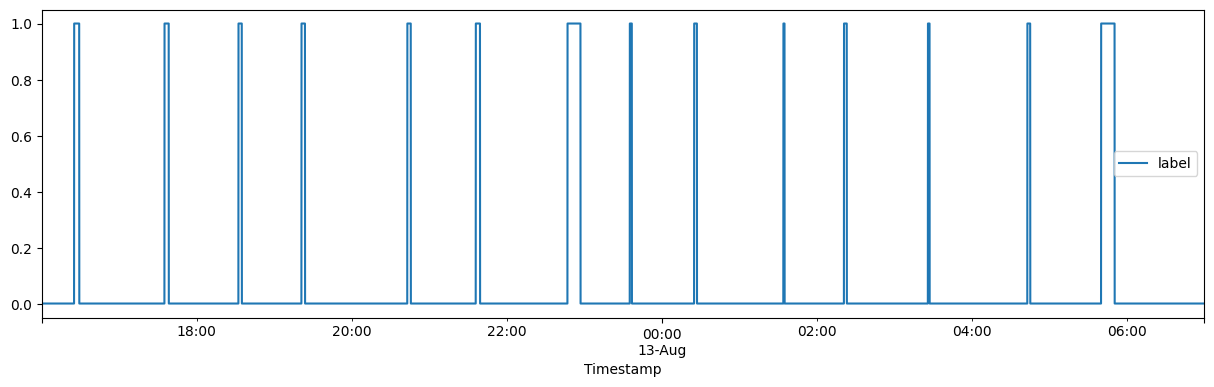

In [32]:
test_label_1.plot("Timestamp", "label", figsize=(15, 4));

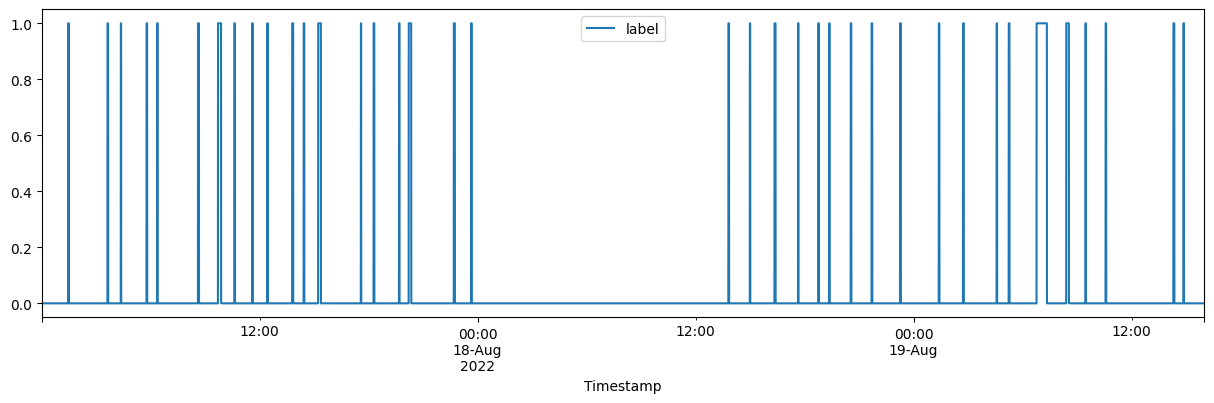

In [33]:
test_label_2.plot("Timestamp", "label", figsize=(15, 4));

# Save prepared data

In [28]:
test_label_1.to_pickle('../data/prepared_data/train_1.pkl')
test_label_2.to_pickle('../data/prepared_data/train_2.pkl')